# **No Convergencia**

El mensaje **"ConvergenceWarning: Objective did not converge"** que aparece durante la ejecución de un modelo Scikit-learn indica que el algoritmo iterativo subyacente utilizado para entrenar el modelo **no alcanzó la convergencia** dentro del número máximo de iteraciones permitidas. 

Esto puede ocurrir en modelos que dependen de optimización iterativa, como:

- Regresión Logística (`LogisticRegression`).
- Modelos lineales regularizados (Ridge, Lasso, ElasticNet).
- Algunos modelos de Support Vector Machines (SVM).

### **Qué significa "no converger"**
Cuando un modelo no converge, significa que el proceso de optimización (por ejemplo, descenso de gradiente) no logró encontrar una solución óptima (o suficientemente cercana a ella) dentro del número máximo de iteraciones configurado. 


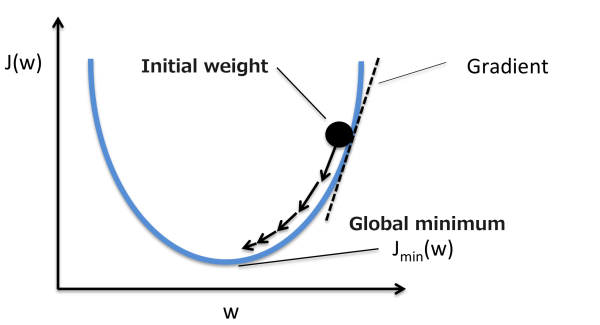

Esto puede deberse a varios factores, como:

1. **Datos mal condicionados:** 
   - Los datos pueden estar desbalanceados, tener características con valores muy grandes o pequeños, o contener colinealidad (características altamente correlacionadas), lo que dificulta la convergencia.

2. **Parámetros inadecuados:**
   - El valor de `max_iter` (número máximo de iteraciones) puede ser demasiado bajo.
   - La tasa de aprendizaje (si aplica) puede ser demasiado alta o baja.
   - La fuerza de regularización (`C`, `alpha`, etc.) puede estar mal ajustada.

3. **Regularización excesiva o insuficiente:**
   - Si la regularización es demasiado fuerte (por ejemplo, un valor alto de `alpha` en Ridge/Lasso), el modelo puede tener dificultades para ajustarse a los datos.
   - Si la regularización es insuficiente, el modelo puede intentar ajustarse demasiado y no converger.

4. **Problemas numéricos:**
   - Si los datos no están escalados adecuadamente (por ejemplo, usando `StandardScaler` o `MinMaxScaler`), el algoritmo puede tener problemas de estabilidad numérica.


### **Cómo Resolver el Problema**

#### **1. Aumentar el Número Máximo de Iteraciones (`max_iter`)**
El parámetro `max_iter` controla el número máximo de iteraciones permitidas para el algoritmo de optimización. Si este valor es demasiado bajo, el modelo puede no tener suficiente tiempo para converger. 

Se puede aumentar:

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Aumenta el número máximo de iteraciones
```

#### **2. Escalar los Datos**
Muchos modelos, especialmente los basados en optimización iterativa, funcionan mejor cuando las características están escaladas. 

Usar `StandardScaler` o `MinMaxScaler` para normalizar los datos:

```python
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])
```

#### **3. Ajustar los Parámetros de Regularización**
Si se usa un modelo regularizado (como Ridge, Lasso o Regresión Logística), asegurarse de ajustar correctamente el parámetro de regularización (`C`, `alpha`, etc.). 

Por ejemplo:
- En Regresión Logística, `C` es inversamente proporcional a la fuerza de regularización. Un valor pequeño de `C` implica mayor regularización.
- En Ridge/Lasso, `alpha` controla directamente la fuerza de la regularización.

¡Experimentar con diferentes valores para encontrar el equilibrio adecuado!

#### **4. Verificar la Calidad de los Datos**
- Asegurarse de que no haya valores atípicos extremos o características altamente correlacionadas.
- Si los datos están desbalanceados (por ejemplo, en problemas de clasificación), considerar técnicas como SMOTE o undersampling para equilibrar las clases.

#### **5. Usar un Solver Diferente**
Algunos modelos permiten especificar diferentes solvers (algoritmos de optimización). 

Por ejemplo, en `LogisticRegression`, se puede probar diferentes solvers como `'lbfgs'`, `'saga'`, o `'newton-cg'`:

```python
model = LogisticRegression(solver='lbfgs', max_iter=1000)
```

#### **6. Ignorar la Advertencia (Solo si es Seguro)**
Si el modelo aún funciona razonablemente bien a pesar de la advertencia, se puede optar por ignorarla. Sin embargo, esto **no es recomendable si la calidad del modelo se ve afectada significativamente**.


```python
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
```